In [ ]:
## Mounting Google Drive
# from google.colab import drive, files
# drive.mount('/content/drive')
from __future__ import absolute_import, print_function,division, unicode_literals
import os.path
import glob
import shutil

import tensorflow as tf
assert tf.__version__.startswith('2')

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,Flatten,MaxPooling2D,Dropout,Dense,Activation
from keras import regularizers
import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib

In [ ]:
zip_file = tf.keras.utils.get_file(origin='https://github.com/inozura/rice-disease-prediction/raw/master/datasets/dataset-rice-disease.zip',
                                   fname='rice-leaf.zip', extract=True)
print(zip_file)
!cp /root/.keras/datasets/rice-leaf.zip /content/
!unzip /content/rice-leaf.zip;

42283388/42283388 [==============================] - 0s 0us/step
/root/.keras/datasets/rice-leaf.zip
Archive:  /content/rice-leaf.zip
   creating: Dataset/
  inflating: Dataset/.DS_Store       
  inflating: __MACOSX/Dataset/._.DS_Store  
   creating: Dataset/Bacterial leaf blight/
   creating: Dataset/Leaf smut/
   creating: Dataset/Brown spot/
  inflating: Dataset/Bacterial leaf blight/DSC_0385.jpg  
  inflating: Dataset/Bacterial leaf blight/DSC_0390.JPG  
  inflating: Dataset/Bacterial leaf blight/DSC_0384.JPG  
  inflating: Dataset/Bacterial leaf blight/DSC_0392.JPG  
  inflating: Dataset/Bacterial leaf blight/DSC_0386.JPG  
  inflating: Dataset/Bacterial leaf blight/DSC_0379.JPG  
  inflating: Dataset/Bacterial leaf blight/blight-_0_5273.jpg  
  inflating: __MACOSX/Dataset/Bacterial leaf blight/._blight-_0_5273.jpg  
  inflating: Dataset/Bacterial leaf blight/DSC_0378.JPG  
  inflating: Dataset/Bacterial leaf blight/DSC_0393.JPG  
  inflating: Dataset/Bacterial leaf blight/DSC_039

In [ ]:
BATCH_SIZE = 8
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [ ]:
data_dir ="/content/Dataset"
data_dir = pathlib.Path(data_dir)

CLASS_NAMES = np.array(['Leaf Blight','Brown Spot','Leaf Smut'])

print('Class Names: ', CLASS_NAMES)

Class Names:  ['Leaf Blight' 'Brown Spot' 'Leaf Smut']


In [ ]:
train_path = '/content/Dataset'
test_path = '/content/Dataset'

train_split = 0.8
val_split = 0.2

In [ ]:
image_train_gen = ImageDataGenerator(rescale=1./255,
                                     zoom_range=0.50,
                                     rotation_range=45,
                                     horizontal_flip=True,
                                     width_shift_range=0.15,
                                     validation_split=train_split,
                                     height_shift_range=0.15)

train_data_gen = image_train_gen.flow_from_directory(train_path,
                                                     shuffle=True,
                                                     batch_size=BATCH_SIZE,
                                                     target_size=(IMG_HEIGHT,IMG_WIDTH),
                                                     class_mode='sparse')

img_val_gen = ImageDataGenerator(rescale=1./255, validation_split=val_split)
val_data_gen = img_val_gen.flow_from_directory(test_path,
                                               batch_size=BATCH_SIZE,
                                               target_size=(IMG_HEIGHT,IMG_WIDTH),
                                               class_mode='sparse')

Found 150 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


In [ ]:
def plotImages(image_arr):
    fig,axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img,ax in zip(image_arr,axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

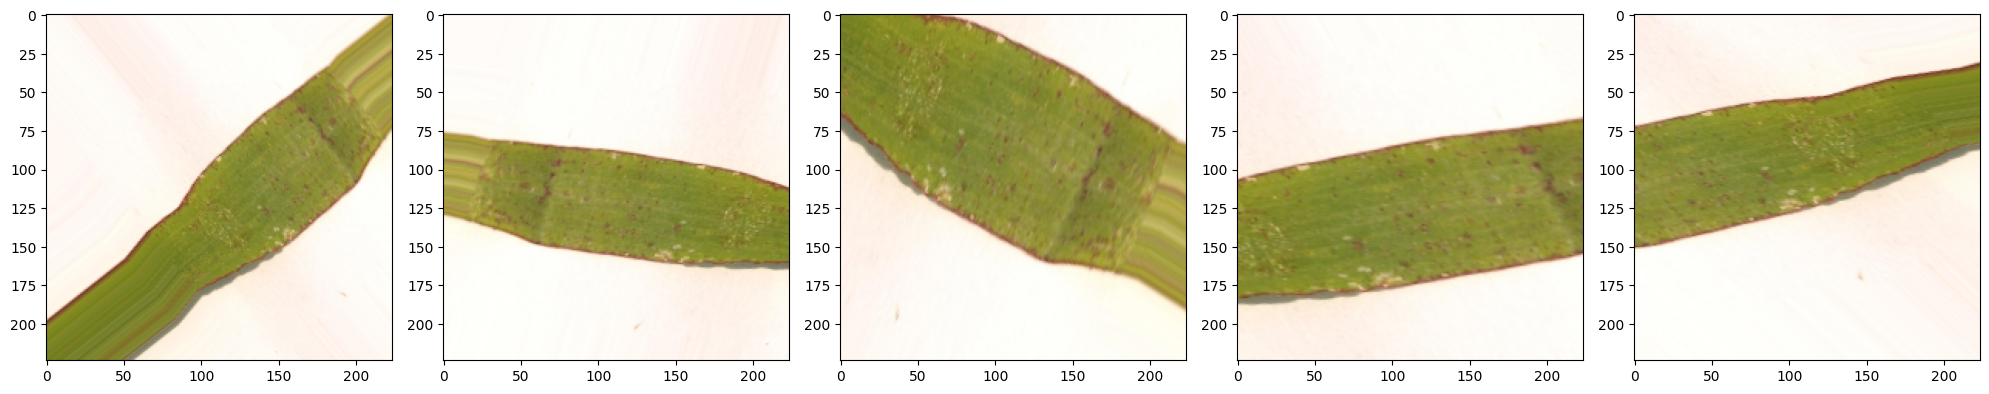

In [ ]:
# Plot a few training images
img_array = [train_data_gen[0][0][0] for i in range(5)]
plotImages(img_array)

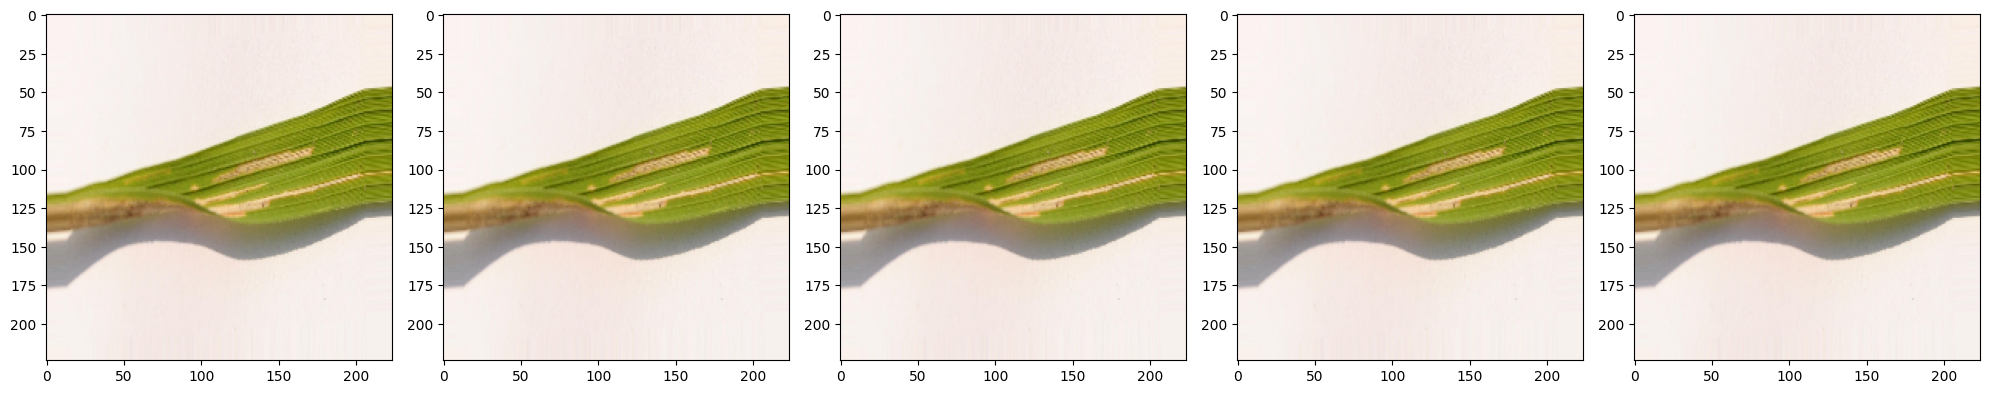

In [ ]:
# plot a few val images
img_array  = [val_data_gen[0][0][0] for i in range(5)]
plotImages(img_array)

In [ ]:
# Model building
#Instatiating A convnet

model = Sequential()
model.add(Conv2D(16, (3,3), input_shape=(224,224,3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(32, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(3, activation="softmax"))

model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ['accuracy']
)

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [ ]:
EPOCHS=70
history = model.fit_generator(train_data_gen, epochs=EPOCHS, validation_data=val_data_gen)

<ipython-input-11-7786d5f387fe>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_data_gen, epochs=EPOCHS, validation_data=val_data_gen)


Epoch 1/70
19/19 [==============================] - 33s 733ms/step - loss: 1.2192 - accuracy: 0.3533 - val_loss: 1.0901 - val_accuracy: 0.3667
Epoch 2/70
19/19 [==============================] - 11s 591ms/step - loss: 1.1014 - accuracy: 0.3600 - val_loss: 1.0510 - val_accuracy: 0.3800
Epoch 3/70
19/19 [==============================] - 12s 647ms/step - loss: 1.0499 - accuracy: 0.3800 - val_loss: 0.9849 - val_accuracy: 0.5333
Epoch 4/70
19/19 [==============================] - 11s 589ms/step - loss: 0.9969 - accuracy: 0.4800 - val_loss: 0.9662 - val_accuracy: 0.5400
Epoch 5/70
19/19 [==============================] - 11s 594ms/step - loss: 0.9838 - accuracy: 0.5133 - val_loss: 0.9171 - val_accuracy: 0.5467
Epoch 6/70
19/19 [==============================] - 10s 538ms/step - loss: 0.9449 - accuracy: 0.5867 - val_loss: 0.8826 - val_accuracy: 0.5467
Epoch 7/70
19/19 [==============================] - 11s 592ms/step - loss: 0.9712 - accuracy: 0.4867 - val_loss: 0.8574 - val_accuracy: 0.5667

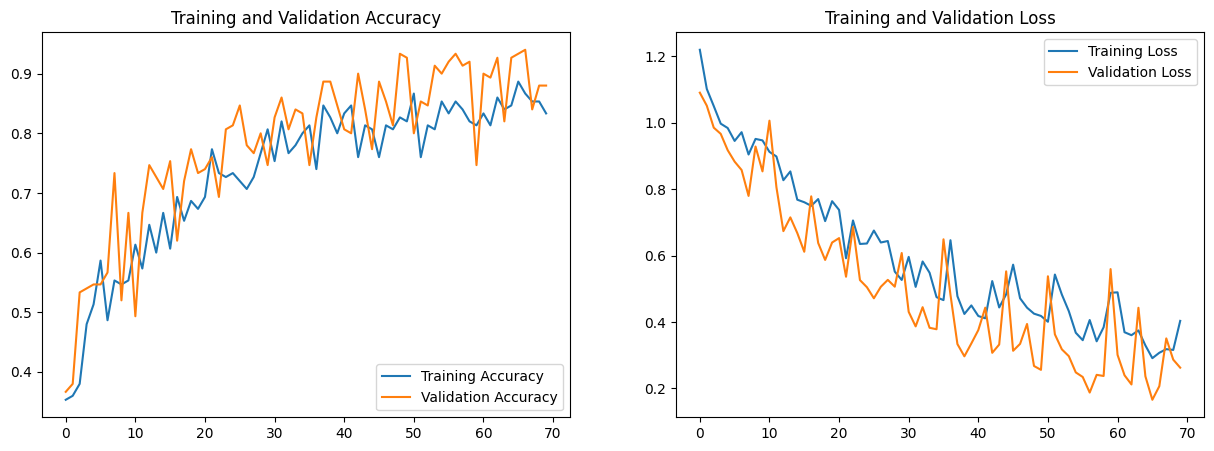

In [ ]:
# Plot training and validation graphs
acc = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_accuracy,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Build Model

In [ ]:
# Saving Model
model.save("model.tf")

model = keras.models.load_model("model.tf")

# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TF Lite model.
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)